In [1]:
#%matplotlib widget

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [12]:

# Define the path to your JSONL file
file_path = 'test-data/montage2_d3.0_logs/metrics.jsonl'

# Read the JSONL file into a pandas DataFrame
df = pd.read_json(file_path, lines=True)

# Display the DataFrame
display(df.head(10))


time    workflowId               jobId  handlerId  \
0  2022-07-14T21:51:11.781  mhp-XEhch-10  mhp-XEhch-10-11733  ORPMFPxCk   
1  2022-07-14T21:51:12.014  mhp-XEhch-10  mhp-XEhch-10-11733  ORPMFPxCk   
2  2022-07-14T21:51:12.018  mhp-XEhch-10  mhp-XEhch-10-11733  ORPMFPxCk   
3  2022-07-14T21:51:12.041  mhp-XEhch-10  mhp-XEhch-10-11733  ORPMFPxCk   
4  2022-07-14T21:51:12.387  mhp-XEhch-10  mhp-XEhch-10-11733  ORPMFPxCk   
5  2022-07-14T21:51:12.387  mhp-XEhch-10  mhp-XEhch-10-11733  ORPMFPxCk   
6  2022-07-14T21:51:12.387  mhp-XEhch-10  mhp-XEhch-10-11733  ORPMFPxCk   
7  2022-07-14T21:51:14.020  mhp-XEhch-10  mhp-XEhch-10-11733  ORPMFPxCk   
8  2022-07-14T21:51:14.021  mhp-XEhch-10  mhp-XEhch-10-11733  ORPMFPxCk   
9  2022-07-14T21:51:14.389  mhp-XEhch-10  mhp-XEhch-10-11733  ORPMFPxCk   

  parameter                                              value      name   pid  
0     event                                       handlerStart  mProject   NaN  
1        io  {'read': 1353, 'write': 1, 'readSyscalls': 5, ...  mProject  18.0  
2   network  {'name': 'eth0', 'rxBytes': 6183, 'rxPackets':...  mProject  18.0  
3     event                                           jobStart  mProject   NaN  
4       cpu                                                  0  mProject  18.0  
5    memory                                            2756608  mProject  18.0  
6     ctime                                                 70  mProject  18.0  
7        io  {'read': 2941926, 'write': 1, 'readSyscalls': ...  mProject  18.0  
8   network  {'name': 'eth0', 'rxBytes': 6273, 'rxPackets':...  mProject  18.0  
9       cpu                                          90.950226  mProject  18.0

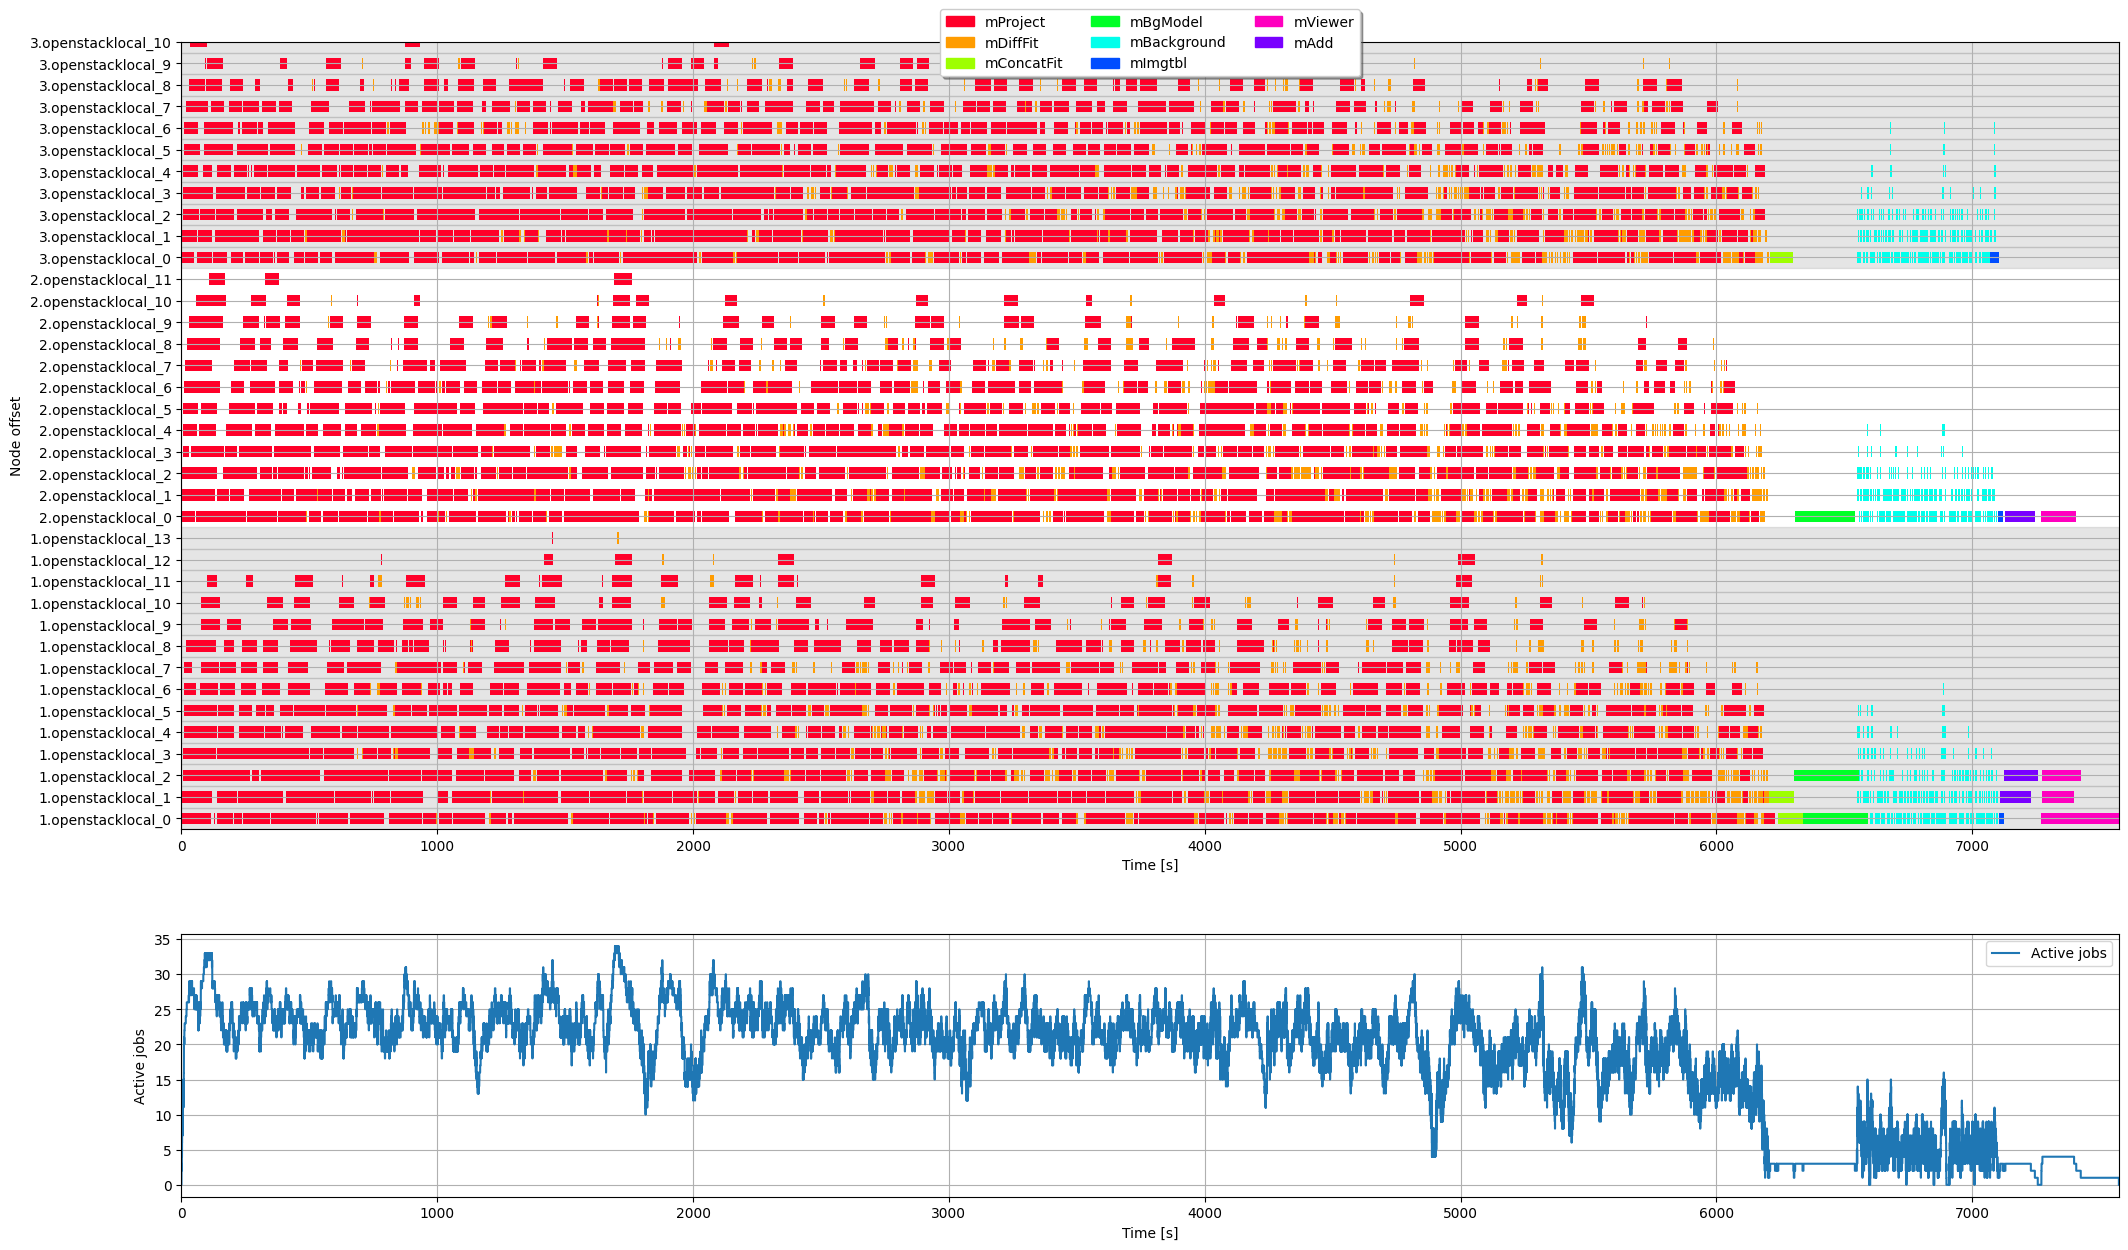

In [11]:
from hyperflow_viz_trace import main as hfviz

hfviz.visualize_dir("test-data/montage2_d3.0_logs", True, True, False, False)
#fig = plt.gcf()
#fig.set_size_inches(18, 10)
#plt.show()

/tmp/ipykernel_353773/4260947612.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parameter_df['value'] = pd.to_numeric(parameter_df['value'], errors='coerce')


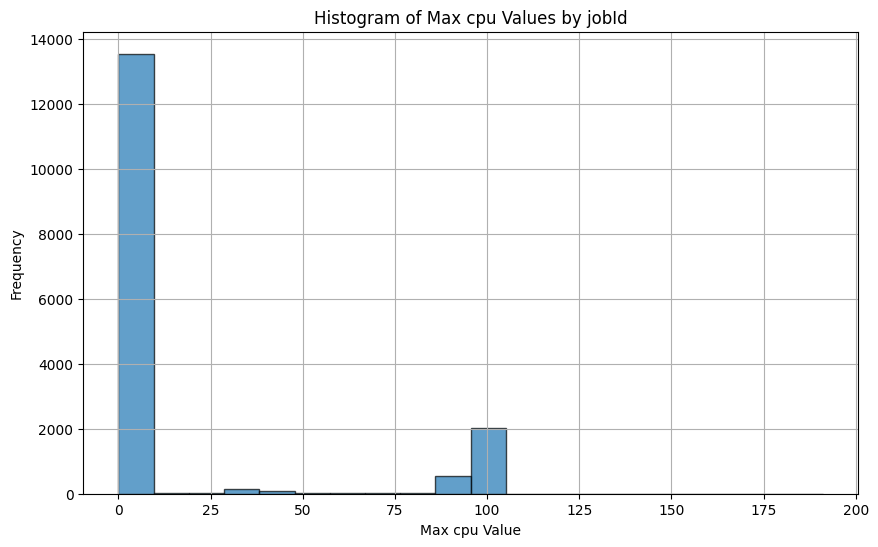

In [4]:
import matplotlib.pyplot as plt

# Define the parameter you want to analyze (e.g., 'cpu')
parameter = 'cpu'

# Filter the DataFrame for the given parameter
parameter_df = df[df['parameter'] == parameter]

# Convert 'value' column to numeric if necessary (for numeric parameters like 'cpu')
parameter_df['value'] = pd.to_numeric(parameter_df['value'], errors='coerce')

# Group by 'jobId' and calculate the max value for each group
max_values_by_job = parameter_df.groupby('jobId')['value'].max()

# Plot a histogram of the max values
plt.figure(figsize=(10, 6))
plt.hist(max_values_by_job.dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title(f'Histogram of Max {parameter} Values by jobId')
plt.xlabel(f'Max {parameter} Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/tmp/ipykernel_353773/2914266344.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_df['value'] = pd.to_numeric(cpu_df['value'], errors='coerce')


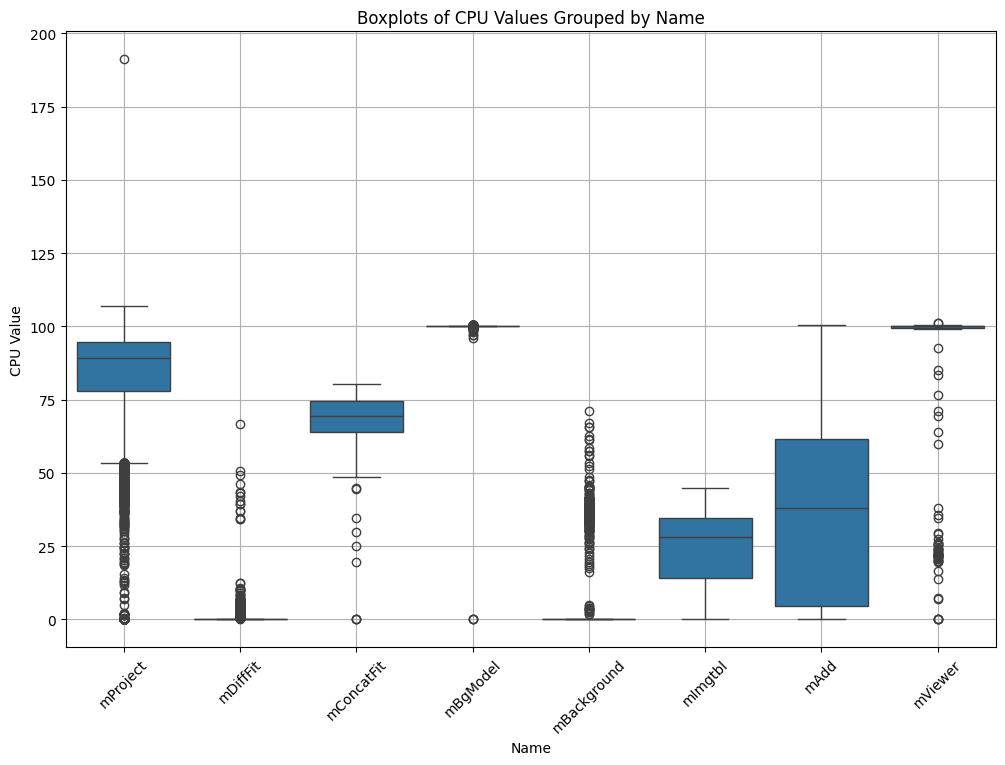

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the 'cpu' parameter
cpu_df = df[df['parameter'] == 'cpu']

# Convert 'value' column to numeric
cpu_df['value'] = pd.to_numeric(cpu_df['value'], errors='coerce')

# Plot boxplots for 'cpu' grouped by 'name'
plt.figure(figsize=(12, 8))
sns.boxplot(data=cpu_df, x='name', y='value')
plt.title('Boxplots of CPU Values Grouped by Name')
plt.xlabel('Name')
plt.ylabel('CPU Value')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


/tmp/ipykernel_353773/596625994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_df['value'] = pd.to_numeric(cpu_df['value'], errors='coerce')


nrows= 3


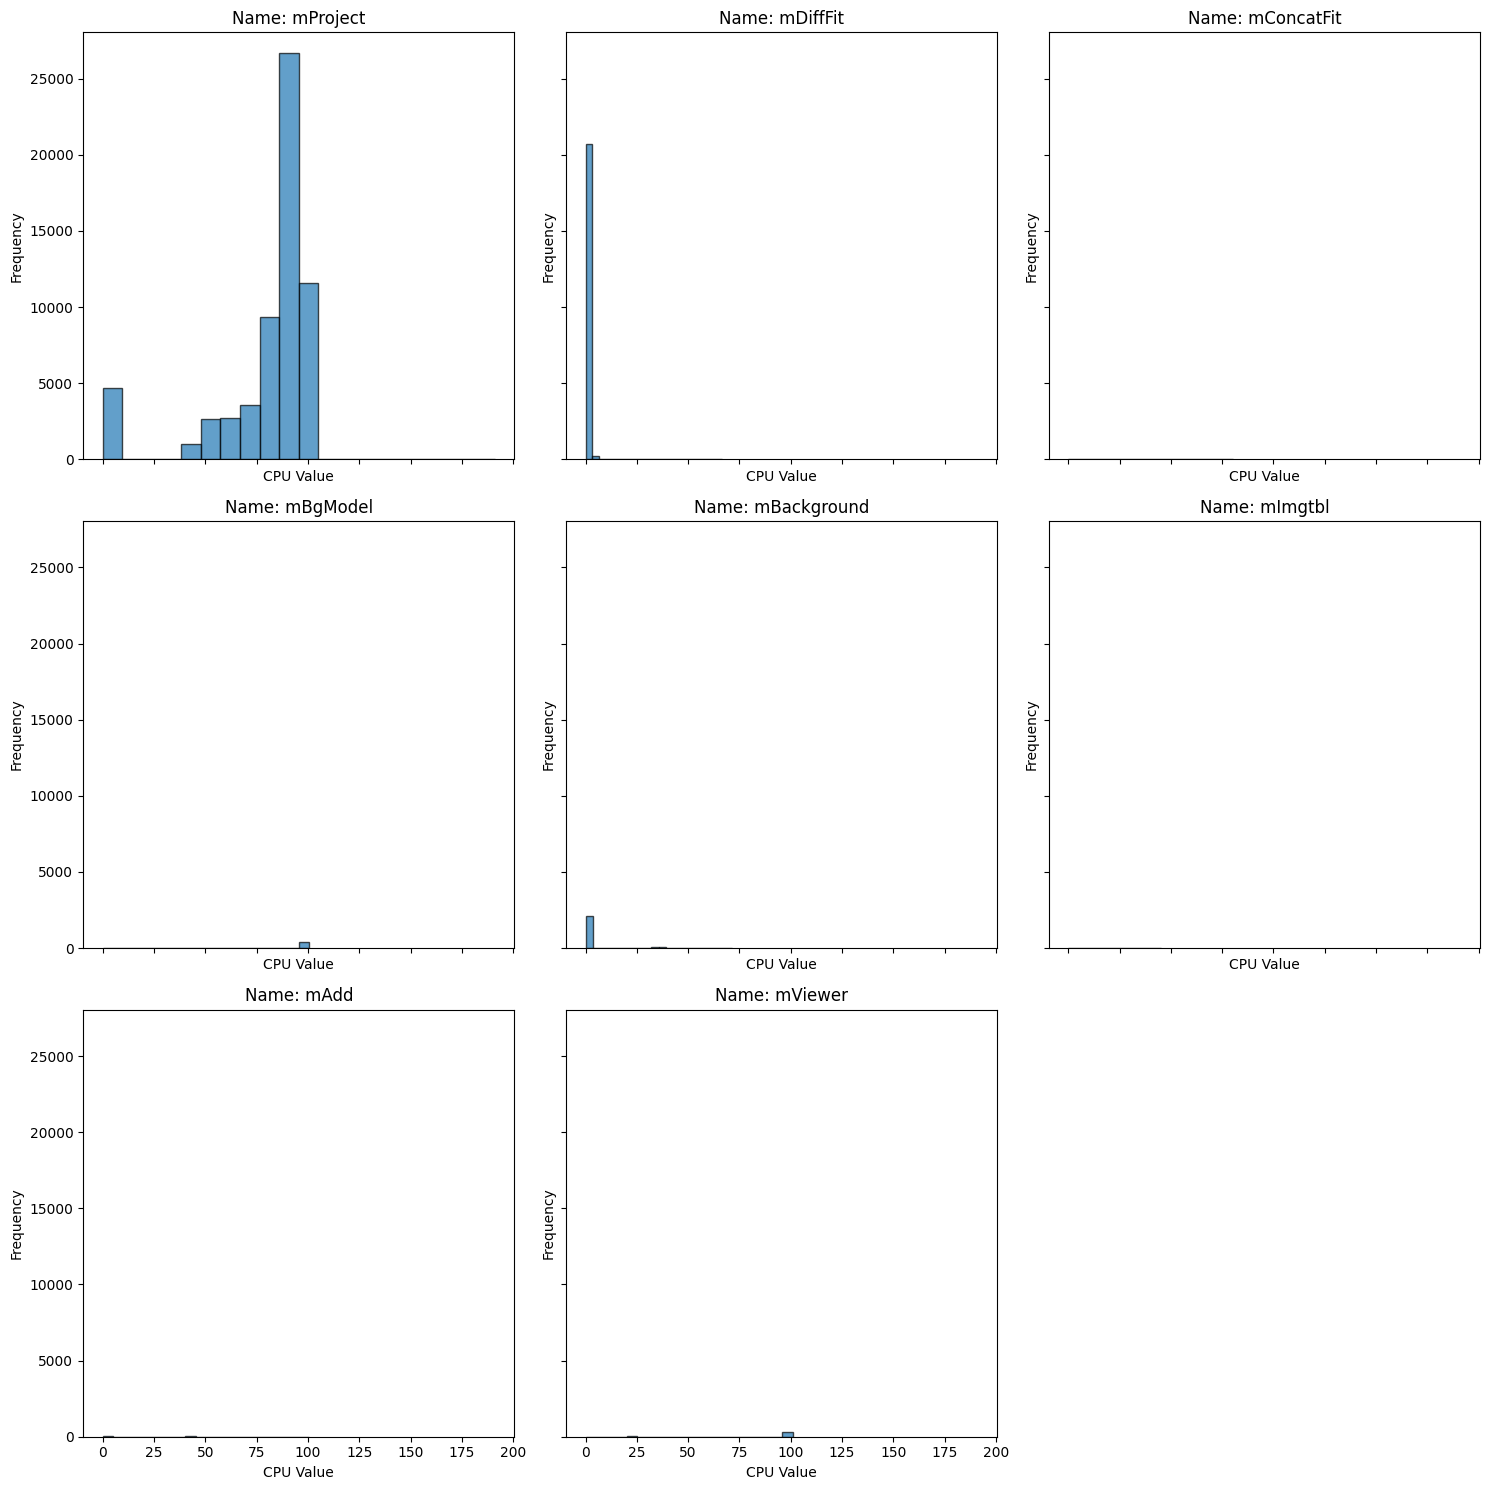

In [6]:

# Filter the DataFrame for the 'cpu' parameter
cpu_df = df[df['parameter'] == 'cpu']

# Convert 'value' column to numeric
cpu_df['value'] = pd.to_numeric(cpu_df['value'], errors='coerce')

# Get the list of unique names
names = cpu_df['name'].unique()

# Define the number of rows and columns for the grid
n_cols = 3
n_rows = -(-len(names) // n_cols)  # This ensures we have enough rows
print('nrows=', n_rows)

# Create a grid of histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), sharex=True, sharey=True)
axes = axes.flatten()

for i, name in enumerate(names):
    ax = axes[i]
    name_df = cpu_df[cpu_df['name'] == name]
    ax.hist(name_df['value'].dropna(), bins=20, edgecolor='k', alpha=0.7)
    ax.set_title(f'Name: {name}')
    ax.set_xlabel('CPU Value')
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


/tmp/ipykernel_353773/2469603704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_df['time'] = pd.to_datetime(event_df['time'])


16413
value
jobId                    mhp-XEhch-10-11733
jobEnd           2022-07-14 21:52:02.746000
jobStart         2022-07-14 21:51:12.041000
job_number                                1
start_seconds                           0.0
end_seconds                          50.705
Name: 1928, dtype: object
value
jobId                    mhp-XEhch-10-11767
jobEnd           2022-07-14 21:51:12.792000
jobStart         2022-07-14 21:51:12.096000
job_number                                2
start_seconds                         0.055
end_seconds                           0.751
Name: 1965, dtype: object
value
jobId                    mhp-XEhch-10-11745
jobEnd           2022-07-14 21:52:07.198000
jobStart         2022-07-14 21:51:12.354000
job_number                                3
start_seconds                         0.313
end_seconds                          55.157
Name: 1941, dtype: object
value
jobId                    mhp-XEhch-10-11768
jobEnd           2022-07-14 21:52:06.227000
jobStart    

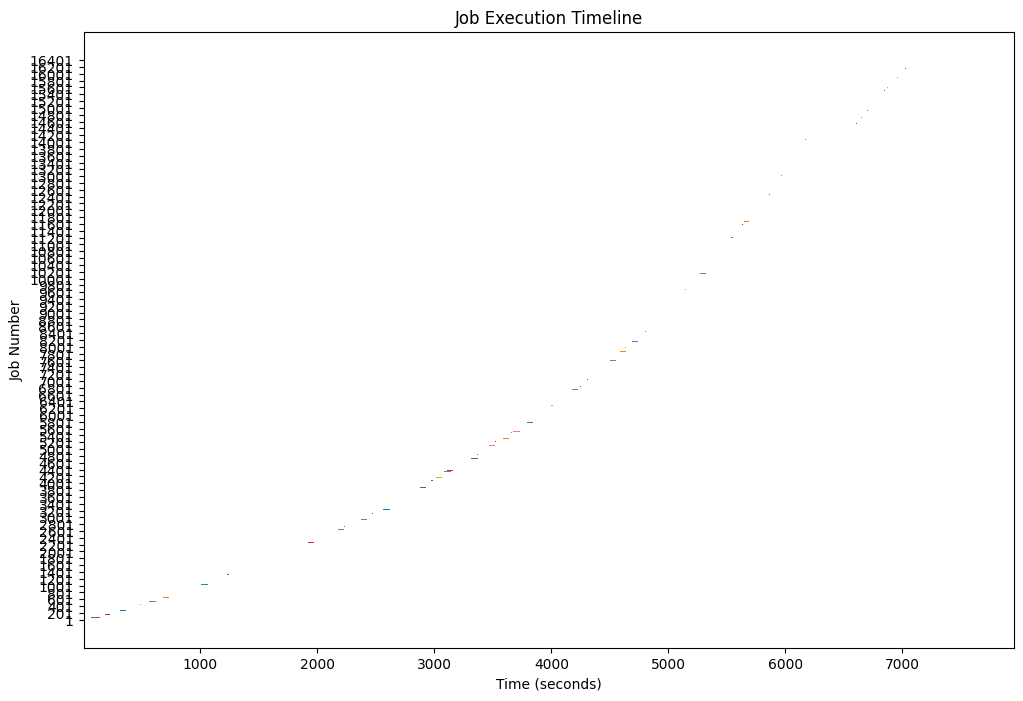

In [8]:
# Filter the DataFrame for the 'event' parameter with values 'jobStart' and 'jobEnd'
event_df = df[(df['parameter'] == 'event') & (df['value'].isin(['jobStart', 'jobEnd']))]

# Convert 'time' column to datetime
event_df['time'] = pd.to_datetime(event_df['time'])

# Pivot the table to get start and end times for each jobId
timeline_df = event_df.pivot_table(index='jobId', columns='value', values='time', aggfunc='first').reset_index()

# Drop rows with missing values (incomplete job start/end)
timeline_df.dropna(subset=['jobStart', 'jobEnd'], inplace=True)

# Sort jobs by start time
timeline_df.sort_values(by='jobStart', inplace=True)

print(len(timeline_df))

# Add a job number for the y-axis
timeline_df['job_number'] = range(1, len(timeline_df) + 1)

# Calculate the start time in seconds from the earliest start time
earliest_start = timeline_df['jobStart'].min()
timeline_df['start_seconds'] = (timeline_df['jobStart'] - earliest_start).dt.total_seconds()
timeline_df['end_seconds'] = (timeline_df['jobEnd'] - earliest_start).dt.total_seconds()

# Plot the timeline
fig, ax = plt.subplots(figsize=(12, 8))

# Create a horizontal bar for each job
for idx, row in timeline_df.iterrows():
    print(row)
    ax.barh(row['job_number'], row['end_seconds'] - row['start_seconds'], left=row['start_seconds'], height=0.4)

# Set the x-axis to represent seconds
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Job Number')
ax.set_title('Job Execution Timeline')

# Set the y-axis to be job numbers, showing only every 10th job number to avoid overlap
yticks = range(1, len(timeline_df) + 1, 200)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

plt.show()


/tmp/ipykernel_353773/3937002370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_df['value'] = pd.to_numeric(cpu_df['value'], errors='coerce')
/tmp/ipykernel_353773/3937002370.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_df['time'] = pd.to_datetime(cpu_df['time'])
/tmp/ipykernel_353773/3937002370.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

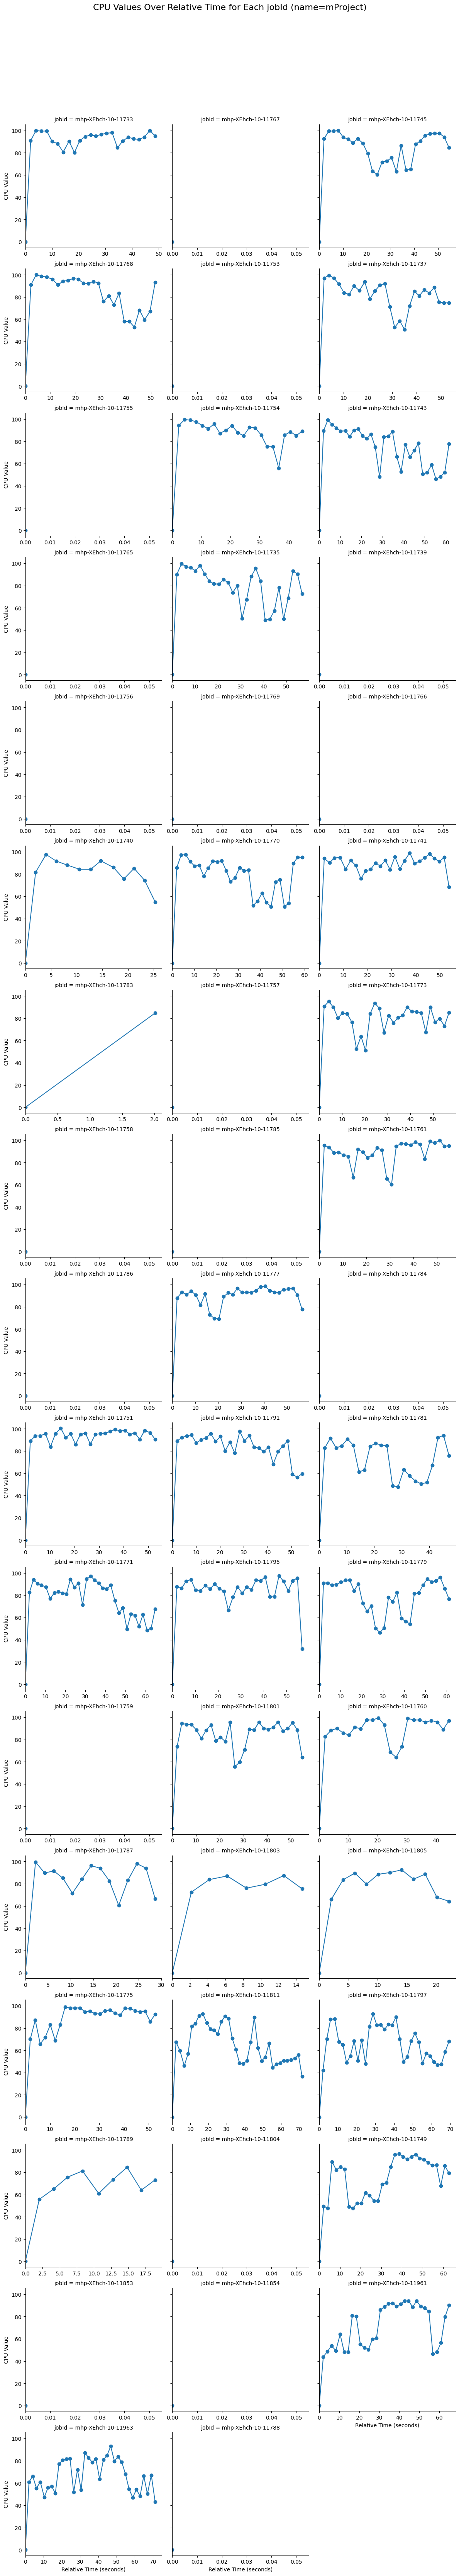

In [9]:
# Filter the DataFrame for the 'cpu' parameter and name='mProject'
cpu_df = df[(df['parameter'] == 'cpu') & (df['name'] == 'mProject')]

# Convert 'value' column to numeric
cpu_df['value'] = pd.to_numeric(cpu_df['value'], errors='coerce')

# Convert 'time' column to datetime
cpu_df['time'] = pd.to_datetime(cpu_df['time'])

n_unique_job_ids = 50

# Select 100 unique jobId values
unique_job_ids = cpu_df['jobId'].unique()[:n_unique_job_ids]

# Filter the cpu_df DataFrame to include only rows with the selected jobId values
filtered_cpu_df = cpu_df[cpu_df['jobId'].isin(unique_job_ids)]

# Adjust the 'time' column to start from 0 for each 'jobId'
filtered_cpu_df['relative_time'] = filtered_cpu_df.groupby('jobId')['time'].transform(lambda x: (x - x.min()).dt.total_seconds())

# Define the number of rows and columns for the grid
n_cols = 3
n_rows = math.ceil(n_unique_job_ids / n_cols)  # This ensures we have enough rows

# Create a FacetGrid for the 'cpu' values over relative time grouped by 'jobId'
g = sns.FacetGrid(filtered_cpu_df, col='jobId', col_wrap=n_cols, height=4, aspect=1.0, sharex=False, sharey=True)
g.map(plt.plot, 'relative_time', 'value', marker='o', linestyle='-')

# Add axis labels and title
g.set_axis_labels('Relative Time (seconds)', 'CPU Value')
g.figure.suptitle('CPU Values Over Relative Time for Each jobId (name=mProject)', fontsize=16)
plt.subplots_adjust(top=0.9 + 0.002 * n_rows)  # Dynamically adjust top spacing based on number of rows

# Set the x-axis limit to start from 0 for all subplots
for ax in g.axes.flatten():
    ax.set_xlim(left=0)

plt.show()
